![example](images/director_shot.jpeg)

# Microsoft's Movie Studio

**Authors:** Elsheikh Zumrawi
***

## Overview

Microsoft is creating a new movie studio but lacks knowledge on what types of movies to produce. They need to analyze box office trends using data from movie databases and ticket sales records. The findings can be used to guide their decisions on movie genres, budget allocation, and marketing strategies (consultation of a successful studio). The recommendation is to prioritize successful genres and consider niche markets for growth.

## Business Problem
Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.


***


## Data Understanding

The four datasets, imdb.title.basics, imdb.title.ratings, bom.movie_gross, and tn.movie_budgets, are all part of IMDb and contain information about movie titles, box office gross revenue, ratings, and budgets. They can be used to analyze trends and factors that contribute to a movie's success or failure. The target variables for analysis will include box office gross revenue, IMDb rating, production budget, and genre. 
Questions to consider:

***

In [94]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import FormatStrFormatter
import seaborn as sns

%matplotlib inline

In [95]:
# Here you run your code to explore the data
#tb = title basics 
#tr = title_ratings
#mg = movie gross
#mb = movie budgets
tb = pd.read_csv('C:/Users/zumrae01/Documents/GitHub/dsc-phase-1-project/zippedData/imdb.title.basics.csv.gz')
tr = pd.read_csv('C:/Users/zumrae01/Documents/GitHub/dsc-phase-1-project/zippedData/imdb.title.ratings.csv.gz')
mg = pd.read_csv('C:/Users/zumrae01/Documents/GitHub/dsc-phase-1-project/zippedData/bom.movie_gross.csv.gz')
mb = pd.read_csv('C:/Users/zumrae01/Documents/GitHub/dsc-phase-1-project/zippedData/tn.movie_budgets.csv.gz')

## Title.basics
***

In [96]:
#we need to view the data
tb.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [97]:
print(tb.shape)

(146144, 6)


In [98]:
tb.isnull().sum()

tconst                 0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [99]:
null_percent1 = round((tb.isnull().sum() / len(tb)) * 100,2).astype(str) + '%'

In [100]:
print(null_percent1)

tconst               0.0%
primary_title        0.0%
original_title      0.01%
start_year           0.0%
runtime_minutes    21.72%
genres               3.7%
dtype: object


## Title.rating
***


In [101]:
tr.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [102]:
print(tr.shape)

(73856, 3)


In [103]:
tr.isnull().sum()

tconst           0
averagerating    0
numvotes         0
dtype: int64

In [104]:
null_percent2 = round((tr.isnull().sum() / len(tr)) * 100,2).astype(str) + '%'

In [105]:
print(null_percent2)

tconst           0.0%
averagerating    0.0%
numvotes         0.0%
dtype: object


## movie_gross
***


In [106]:
mg.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [107]:
print(mg.shape)

(3387, 5)


In [108]:
mg.isnull().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [109]:
null_percent3 = round((mg.isnull().sum() / len(mg)) * 100,2).astype(str) + '%'

In [110]:
print(null_percent3)

title               0.0%
studio             0.15%
domestic_gross     0.83%
foreign_gross     39.86%
year                0.0%
dtype: object


## movie_budgets
***


In [111]:
mb.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [112]:
print(mb.shape)

(5782, 6)


In [113]:
mb.isnull().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

## Merging of data
***


### Merging of title.basics and title.ratings 

In [114]:
#we're gonna merge 1) tb+tr 2)tb+mg 3)tb+mb
#merge tb and tr
tb_tr= pd.merge(tb, tr, on='tconst')


In [115]:
tb_tr.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


### Merging of title.basics and movie.budget 

In [116]:
#merge tb and mb
mb = mb.rename(columns={"movie": "primary_title"})
tb_mb= pd.merge(tb, mb[['primary_title','production_budget','release_date','domestic_gross','worldwide_gross']], left_on=['primary_title', 'original_title'], right_on=['primary_title', 'primary_title'], how='inner')

tb_mb.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,production_budget,release_date,domestic_gross,worldwide_gross
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy","$45,000,000","Dec 31, 2012",$0,"$73,706"
1,tt0293429,Mortal Kombat,Mortal Kombat,2021,NaN,"Action,Adventure,Fantasy","$20,000,000","Aug 18, 1995","$70,433,227","$122,133,227"
2,tt0326592,The Overnight,The Overnight,2010,88.0,NaN,"$200,000","Jun 19, 2015","$1,109,808","$1,165,996"
3,tt3844362,The Overnight,The Overnight,2015,79.0,"Comedy,Mystery","$200,000","Jun 19, 2015","$1,109,808","$1,165,996"
4,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance","$25,000,000","Mar 22, 2013","$720,828","$9,313,302"


### Merging of title.basics and movie.gross

In [117]:
#merge tb and mg
mg = mg.rename(columns={"title": "primary_title"})
tb_mg = pd.merge(tb, mg[['primary_title', 'studio', 'year', 'domestic_gross', 'foreign_gross']], left_on=['primary_title', 'original_title'], right_on=['primary_title', 'primary_title'], how='inner')
tb_mg.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,studio,year,domestic_gross,foreign_gross
0,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",Relbig.,2016,1100000.0,NaN
1,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",IFC,2012,744000.0,8000000
2,tt2404548,On the Road,On the Road,2011,90.0,Drama,IFC,2012,744000.0,8000000
3,tt3872966,On the Road,On the Road,2013,87.0,Documentary,IFC,2012,744000.0,8000000
4,tt4339118,On the Road,On the Road,2014,89.0,Drama,IFC,2012,744000.0,8000000


## Movies, genres and ratings

In [118]:
# Exploring tb_tr, tb_mb and tb_mg.

In [119]:
tb_tr.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [120]:
tb_tr.tail()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,NaN,6.6,5
73855,tt9916160,Drømmeland,Drømmeland,2019,72.0,Documentary,6.5,11


In [121]:
tb_tr.isnull().sum()

tconst                0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres              804
averagerating         0
numvotes              0
dtype: int64

In [122]:
null_percent4 = round((tb_tr.isnull().sum() / len(tb_tr)) * 100,2).astype(str) + '%'

In [123]:
print(null_percent4)

tconst               0.0%
primary_title        0.0%
original_title       0.0%
start_year           0.0%
runtime_minutes    10.32%
genres              1.09%
averagerating        0.0%
numvotes             0.0%
dtype: object


## Movies, genres and budget.

In [124]:
tb_mb.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,production_budget,release_date,domestic_gross,worldwide_gross
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy","$45,000,000","Dec 31, 2012",$0,"$73,706"
1,tt0293429,Mortal Kombat,Mortal Kombat,2021,NaN,"Action,Adventure,Fantasy","$20,000,000","Aug 18, 1995","$70,433,227","$122,133,227"
2,tt0326592,The Overnight,The Overnight,2010,88.0,NaN,"$200,000","Jun 19, 2015","$1,109,808","$1,165,996"
3,tt3844362,The Overnight,The Overnight,2015,79.0,"Comedy,Mystery","$200,000","Jun 19, 2015","$1,109,808","$1,165,996"
4,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance","$25,000,000","Mar 22, 2013","$720,828","$9,313,302"


In [125]:
tb_mb.tail()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,production_budget,release_date,domestic_gross,worldwide_gross
3439,tt9678962,Fuel,Fuel,2018,NaN,"Documentary,Sport","$2,500,000","Nov 14, 2008","$174,255","$174,255"
3440,tt9729206,Diner,Diner,2019,NaN,Crime,"$5,000,000","Apr 2, 1982","$12,592,907","$12,592,907"
3441,tt9805168,Traitor,Traitor,2015,110.0,"Action,Drama,Romance","$22,000,000","Aug 27, 2008","$23,530,831","$27,882,226"
3442,tt9844102,Ray,Ray,2018,111.0,Crime,"$40,000,000","Oct 29, 2004","$75,305,995","$124,823,094"
3443,tt9893078,Sublime,Sublime,2019,NaN,Documentary,"$1,800,000","Mar 13, 2007",$0,$0


In [126]:
tb_mb.isnull().sum()

tconst                 0
primary_title          0
original_title         0
start_year             0
runtime_minutes      462
genres                63
production_budget      0
release_date           0
domestic_gross         0
worldwide_gross        0
dtype: int64

In [127]:
null_percent5 = round((tb_mb.isnull().sum() / len(tb_mb)) * 100,2).astype(str) + '%'

In [128]:
print(null_percent5)

tconst                 0.0%
primary_title          0.0%
original_title         0.0%
start_year             0.0%
runtime_minutes      13.41%
genres                1.83%
production_budget      0.0%
release_date           0.0%
domestic_gross         0.0%
worldwide_gross        0.0%
dtype: object


In [129]:
print(tb_mb.shape)

(3444, 10)


## Movies, genres, studios and gross.

In [130]:
tb_mg.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,studio,year,domestic_gross,foreign_gross
0,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",Relbig.,2016,1100000.0,NaN
1,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",IFC,2012,744000.0,8000000
2,tt2404548,On the Road,On the Road,2011,90.0,Drama,IFC,2012,744000.0,8000000
3,tt3872966,On the Road,On the Road,2013,87.0,Documentary,IFC,2012,744000.0,8000000
4,tt4339118,On the Road,On the Road,2014,89.0,Drama,IFC,2012,744000.0,8000000


In [131]:
tb_mg.tail()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,studio,year,domestic_gross,foreign_gross
2726,tt8427036,Helicopter Eela,Helicopter Eela,2018,135.0,Drama,Eros,2018,72000.0,NaN
2727,tt8802728,The Witch,The Witch,2018,NaN,Horror,A24,2016,25100000.0,15300000
2728,tt8851262,Spring Fever,Spring Fever,2019,NaN,"Comedy,Horror",Strand,2010,10800.0,150000
2729,tt9151704,Burn the Stage: The Movie,Burn the Stage: The Movie,2018,84.0,"Documentary,Music",Trafalgar,2018,4200000.0,16100000
2730,tt9805754,Double Trouble,Double Trouble,2013,99.0,"Comedy,Family",CL,2012,44800.0,NaN


In [132]:
tb_mg.isnull().sum()

tconst               0
primary_title        0
original_title       0
start_year           0
runtime_minutes    164
genres              36
studio               3
year                 0
domestic_gross      20
foreign_gross      979
dtype: int64

In [133]:
null_percent6 = round((tb_mg.isnull().sum() / len(tb_mg)) * 100,2).astype(str) + '%'

In [134]:
print(null_percent6)

tconst               0.0%
primary_title        0.0%
original_title       0.0%
start_year           0.0%
runtime_minutes     6.01%
genres              1.32%
studio              0.11%
year                 0.0%
domestic_gross      0.73%
foreign_gross      35.85%
dtype: object


In [135]:
print(tb_mg.shape)

(2731, 10)


## Data Preparation

The datasets, imdb.title.basics, imdb.title.ratings, bom.movie_gross, and tn.movie_budgets, were prepared for analysis by dropping null values and incomplete datasets such as 'foreign_gross' and 'runtime_minutes'. Any column with a null percentage of over 5% was also dropped. These choices were appropriate given the data and the business problem as they helped to ensure that the analysis was conducted on complete and accurate data. This approach also helped to reduce the impact of outliers and missing values on the analysis results.

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***

In [136]:
# Here you run your code to clean the data

### The following is perfomed while cleaning the data:

	Remove irrelevant columns 
    Handle missing data
    Handle duplicates
    Standardize data types
    Check for outliers
    Rename columns
    Check for inconsistencies
 ***

### Removing irrelevant columns


Removing 'runtime_minute' from the data as movie time is not a criteria for now.
***

In [137]:
#removing irrelevant columns
tb_tr.drop('runtime_minutes', axis=1, inplace=True)

In [138]:
#handling missing data
tb_tr.dropna(inplace=True)

In [139]:
tb_tr.head()

,tconst,primary_title,original_title,start_year,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,"Comedy,Drama,Fantasy",6.5,119


Cleaning tb_mb
***

In [140]:
tb_mb.drop('runtime_minutes', axis=1, inplace=True)

In [141]:
#handling missing data
tb_mb.dropna(inplace=True)

In [142]:
tb_mb.head()

,tconst,primary_title,original_title,start_year,genres,production_budget,release_date,domestic_gross,worldwide_gross
0,tt0249516,Foodfight!,Foodfight!,2012,"Action,Animation,Comedy","$45,000,000","Dec 31, 2012",$0,"$73,706"
1,tt0293429,Mortal Kombat,Mortal Kombat,2021,"Action,Adventure,Fantasy","$20,000,000","Aug 18, 1995","$70,433,227","$122,133,227"
3,tt3844362,The Overnight,The Overnight,2015,"Comedy,Mystery","$200,000","Jun 19, 2015","$1,109,808","$1,165,996"
4,tt0337692,On the Road,On the Road,2012,"Adventure,Drama,Romance","$25,000,000","Mar 22, 2013","$720,828","$9,313,302"
5,tt2404548,On the Road,On the Road,2011,Drama,"$25,000,000","Mar 22, 2013","$720,828","$9,313,302"


In [143]:
tb_mg.drop('runtime_minutes', axis=1, inplace=True)
tb_mg.drop('foreign_gross', axis=1, inplace=True)
#handling missing data
tb_mg.dropna(inplace=True)

Cleaning tb_mg to only include studios with at least 70 movie produciton experience.
***

In [144]:
tb_mg.head()

,tconst,primary_title,original_title,start_year,genres,studio,year,domestic_gross
0,tt0315642,Wazir,Wazir,2016,"Action,Crime,Drama",Relbig.,2016,1100000.0
1,tt0337692,On the Road,On the Road,2012,"Adventure,Drama,Romance",IFC,2012,744000.0
2,tt2404548,On the Road,On the Road,2011,Drama,IFC,2012,744000.0
3,tt3872966,On the Road,On the Road,2013,Documentary,IFC,2012,744000.0
4,tt4339118,On the Road,On the Road,2014,Drama,IFC,2012,744000.0


In [145]:
num_studios = tb_mg['studio'].nunique()
a_s = tb_mg['studio'].value_counts()  #this is used to count studio frequency
p_s = a_s[a_s > 70].index.tolist() #to extract only studios with frequency > 40
tb_mg_new = tb_mg[tb_mg['studio'].isin(p_s)] 

now a new tb_mg with studios frequency more than 70


In [146]:
tb_mg_new.head() 

,tconst,primary_title,original_title,start_year,genres,studio,year,domestic_gross
1,tt0337692,On the Road,On the Road,2012,"Adventure,Drama,Romance",IFC,2012,744000.0
2,tt2404548,On the Road,On the Road,2011,Drama,IFC,2012,744000.0
3,tt3872966,On the Road,On the Road,2013,Documentary,IFC,2012,744000.0
4,tt4339118,On the Road,On the Road,2014,Drama,IFC,2012,744000.0
5,tt5389486,On the Road,On the Road,2015,Documentary,IFC,2012,744000.0


In [147]:
tb_mg_new.dtypes

tconst             object
primary_title      object
original_title     object
start_year          int64
genres             object
studio             object
year                int64
domestic_gross    float64
dtype: object

### Merging data for analysis
***

Merging the movie budget with studio gross revenue allows us to identify the most profitable studios in the film industry. It provides insights into a movie's success and helps to understand the factors that contribute to it. By identifying profitable studios, it enables informed decisions regarding investments and partnerships.

In [148]:
studio_profit = tb_mg_new.merge(tb_mb, on=['tconst', 'tconst'], how='inner', suffixes=('_mg', '_mb'))

In [149]:
# Find and drop any duplicated columns
dup_cols = set([col for col in studio_profit.columns if studio_profit.columns.duplicated().sum() > 0])
studio_profit.drop(dup_cols, axis=1, inplace=True) 

In [150]:
print(studio_profit.shape)

(979, 16)


In [151]:
studio_profit.head()

,tconst,primary_title_mg,original_title_mg,start_year_mg,genres_mg,studio,year,domestic_gross_mg,primary_title_mb,original_title_mb,start_year_mb,genres_mb,production_budget,release_date,domestic_gross_mb,worldwide_gross
0,tt0337692,On the Road,On the Road,2012,"Adventure,Drama,Romance",IFC,2012,744000.0,On the Road,On the Road,2012,"Adventure,Drama,Romance","$25,000,000","Mar 22, 2013","$720,828","$9,313,302"
1,tt2404548,On the Road,On the Road,2011,Drama,IFC,2012,744000.0,On the Road,On the Road,2011,Drama,"$25,000,000","Mar 22, 2013","$720,828","$9,313,302"
2,tt3872966,On the Road,On the Road,2013,Documentary,IFC,2012,744000.0,On the Road,On the Road,2013,Documentary,"$25,000,000","Mar 22, 2013","$720,828","$9,313,302"
3,tt4339118,On the Road,On the Road,2014,Drama,IFC,2012,744000.0,On the Road,On the Road,2014,Drama,"$25,000,000","Mar 22, 2013","$720,828","$9,313,302"
4,tt5389486,On the Road,On the Road,2015,Documentary,IFC,2012,744000.0,On the Road,On the Road,2015,Documentary,"$25,000,000","Mar 22, 2013","$720,828","$9,313,302"


In [152]:
studio_profit = studio_profit.drop(['start_year_mg', 'genres_mg', 'domestic_gross_mg', 'primary_title_mb', 'original_title_mb', 'start_year_mb', ],  axis=1)

In [153]:
studio_profit['tconst'].duplicated().sum()

21

In [154]:
studio_profit.drop_duplicates(subset='tconst', inplace=True)

In [155]:
print(studio_profit.shape)

(958, 10)


## Merging averagerating with studio_profit

In [156]:
studio_profit = studio_profit.merge(tb_tr[['tconst', 'averagerating']], on='tconst', how='inner')

## MAIN DATA
studio_profit is the final data used for analysis.
***

In [172]:
studio_profit['original_title_mg'].shape

(744,)

In [173]:
num_duplicates = studio_profit.duplicated(['original_title_mg']).sum()
print( num_duplicates)

0


In [159]:
#To remove duplicates in movies
studio_profit.drop_duplicates(['original_title_mg'], inplace=True)

In [160]:
studio_profit.head()

,tconst,primary_title_mg,original_title_mg,studio,year,genres_mb,production_budget,release_date,domestic_gross_mb,worldwide_gross,averagerating
0,tt0337692,On the Road,On the Road,IFC,2012,"Adventure,Drama,Romance","$25,000,000","Mar 22, 2013","$720,828","$9,313,302",6.1
3,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,Fox,2013,"Adventure,Comedy,Drama","$91,000,000","Dec 25, 2013","$58,236,838","$187,861,183",7.3
4,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,Uni.,2014,"Action,Crime,Drama","$28,000,000","Sep 19, 2014","$26,017,685","$62,108,587",6.5
5,tt0369610,Jurassic World,Jurassic World,Uni.,2015,"Action,Adventure,Sci-Fi","$215,000,000","Jun 12, 2015","$652,270,625","$1,648,854,864",7.0
6,tt0383010,The Three Stooges,The Three Stooges,Fox,2012,"Comedy,Family","$30,000,000","Apr 13, 2012","$44,338,224","$54,052,249",5.1


## Data Modeling
The code was run on a 744 movies to show a process for analyzing and modeling the data related to movie studios and their world wode gross revenue. The initial approach involves grouping the data by studio and summing the worldwode, then converting it to a DataFrame and sorting it by total worldwode in descending order. A horizontal bar chart is then created to display the results. The code is then iterated to filter out data before 2000 and create a pivot table to analyze worldwide gross by studio, which is then displayed as a bar chart. Lastly, the code shows the process of grouping data by rating and summing the world wide to create a table. These choices are appropriate as they help to identify the most profitable and high quality studios and analyze their performance over time, which is essential for business decisions and planning in the movie industry.

***


In [161]:
# Here you run your code to model the data 

In [162]:
# This is done to change certain columns type from object to float
studio_profit['production_budget'] = studio_profit['production_budget'].str.replace('$', '').str.replace(',', '')
studio_profit['domestic_gross_mb'] = studio_profit['domestic_gross_mb'].str.replace('$', '').str.replace(',', '')
studio_profit['worldwide_gross'] = studio_profit['worldwide_gross'].str.replace('$', '').str.replace(',', '')
studio_profit['production_budget'] = studio_profit['production_budget'].astype(float)
studio_profit['domestic_gross_mb'] = studio_profit['domestic_gross_mb'].astype(float)
studio_profit['worldwide_gross'] = studio_profit['worldwide_gross'].astype(float)

print(studio_profit['release_date'].dtype)

object


C:\Users\zumrae01\AppData\Local\Temp\ipykernel_10796\123175444.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  studio_profit['production_budget'] = studio_profit['production_budget'].str.replace('$', '').str.replace(',', '')
C:\Users\zumrae01\AppData\Local\Temp\ipykernel_10796\123175444.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  studio_profit['domestic_gross_mb'] = studio_profit['domestic_gross_mb'].str.replace('$', '').str.replace(',', '')
C:\Users\zumrae01\AppData\Local\Temp\ipykernel_10796\123175444.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be

In [163]:
studio_profit['release_date'] = pd.to_datetime(studio_profit['release_date'])
print(studio_profit['release_date'].dtype)

datetime64[ns]


In [164]:
# Group the data by studio and sum the domestic gross
studio_totals = studio_profit.groupby('studio')['worldwide_gross'].sum()

# Convert the resulting Series to a DataFrame and add a column for the studio names
studio_table = pd.DataFrame(studio_totals).reset_index()
studio_table.columns = ['studio', 'total_worldwide_gross']

# Sort the table by total domestic gross in descending order
studio_table = studio_table.sort_values('total_worldwide_gross', ascending=False)
studio_table.head(30)

,studio,total_worldwide_gross
0,BV,3.074100e+10
11,Uni.,2.568339e+10
2,Fox,2.561531e+10
12,WB,2.196405e+10
10,Sony,1.641810e+10
7,Par.,1.373311e+10
5,LGF,6.599606e+09
13,Wein.,2.561024e+09
3,FoxS,2.142183e+09
9,SPC,7.127967e+08


In [165]:
studio_table = studio_table.reset_index(drop=True)
studio_table.index = studio_table.index + 1

## Top revenue studio achievers

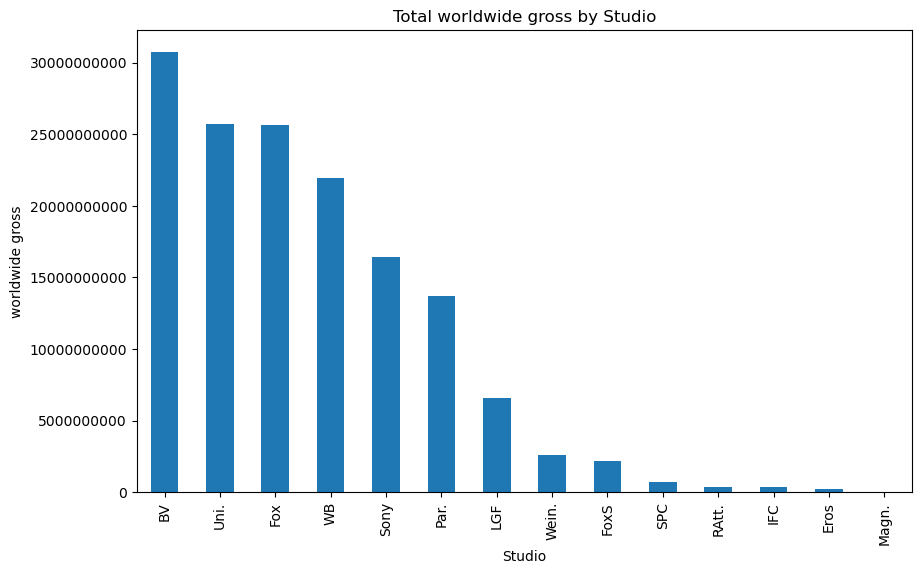

In [166]:
revenue_by_studio = studio_profit.groupby('studio')['worldwide_gross'].sum().sort_values(ascending=False)
ax = revenue_by_studio.plot(kind='bar', figsize=(10,6))
ax.set_title('Total worldwide gross by Studio')
ax.set_xlabel('Studio')
ax.set_ylabel('worldwide gross')
fmt = ticker.ScalarFormatter(useOffset=False)
fmt.set_scientific(False)
ax.yaxis.set_major_formatter(fmt)
ax.yaxis.get_major_formatter().set_useLocale(True)
ax.ticklabel_format(axis='y', style='plain')
plt.show()

In [167]:
studio_profit.head()

,tconst,primary_title_mg,original_title_mg,studio,year,genres_mb,production_budget,release_date,domestic_gross_mb,worldwide_gross,averagerating
0,tt0337692,On the Road,On the Road,IFC,2012,"Adventure,Drama,Romance",25000000.0,2013-03-22,720828.0,9.313302e+06,6.1
3,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,Fox,2013,"Adventure,Comedy,Drama",91000000.0,2013-12-25,58236838.0,1.878612e+08,7.3
4,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,Uni.,2014,"Action,Crime,Drama",28000000.0,2014-09-19,26017685.0,6.210859e+07,6.5
5,tt0369610,Jurassic World,Jurassic World,Uni.,2015,"Action,Adventure,Sci-Fi",215000000.0,2015-06-12,652270625.0,1.648855e+09,7.0
6,tt0383010,The Three Stooges,The Three Stooges,Fox,2012,"Comedy,Family",30000000.0,2012-04-13,44338224.0,5.405225e+07,5.1


## Most profitable studio

In [168]:
studio_profit['profit'] = studio_profit['worldwide_gross'] - studio_profit['production_budget'].replace(1e10, 'billions')
studio_profit.head()

,tconst,primary_title_mg,original_title_mg,studio,year,genres_mb,production_budget,release_date,domestic_gross_mb,worldwide_gross,averagerating,profit
0,tt0337692,On the Road,On the Road,IFC,2012,"Adventure,Drama,Romance",25000000.0,2013-03-22,720828.0,9.313302e+06,6.1,-1.568670e+07
3,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,Fox,2013,"Adventure,Comedy,Drama",91000000.0,2013-12-25,58236838.0,1.878612e+08,7.3,9.686118e+07
4,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,Uni.,2014,"Action,Crime,Drama",28000000.0,2014-09-19,26017685.0,6.210859e+07,6.5,3.410859e+07
5,tt0369610,Jurassic World,Jurassic World,Uni.,2015,"Action,Adventure,Sci-Fi",215000000.0,2015-06-12,652270625.0,1.648855e+09,7.0,1.433855e+09
6,tt0383010,The Three Stooges,The Three Stooges,Fox,2012,"Comedy,Family",30000000.0,2012-04-13,44338224.0,5.405225e+07,5.1,2.405225e+07


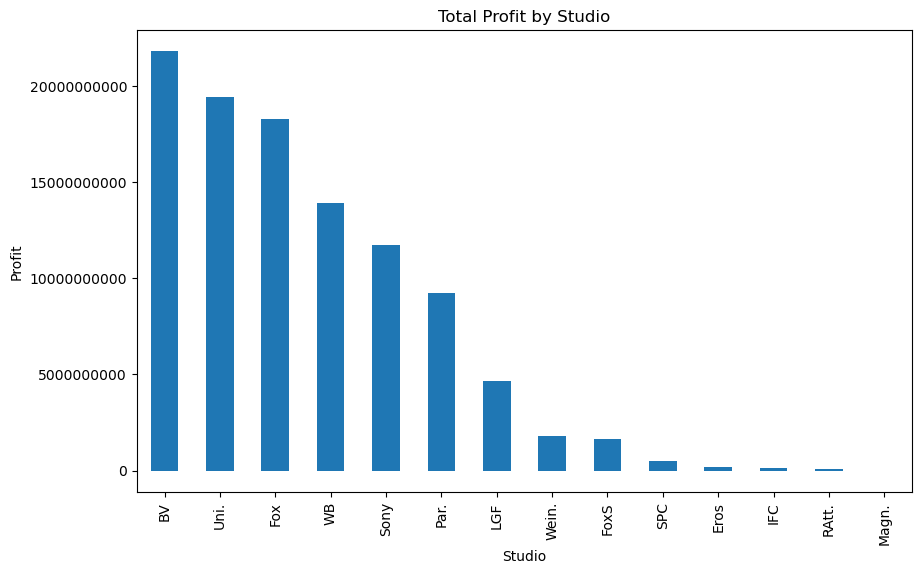

In [169]:
profit_by_studio = studio_profit.groupby('studio')['profit'].sum().sort_values(ascending=False)
ax = profit_by_studio.plot(kind='bar', figsize=(10,6))
ax.set_title('Total Profit by Studio')
ax.set_xlabel('Studio')
ax.set_ylabel('Profit')
fmt = ticker.ScalarFormatter(useOffset=False)
fmt.set_scientific(False)
ax.yaxis.set_major_formatter(fmt)
ax.yaxis.get_major_formatter().set_useLocale(True)
ax.ticklabel_format(axis='y', style='plain')
plt.show()



## Studio's average rating

In [170]:
studio_profit.head()

,tconst,primary_title_mg,original_title_mg,studio,year,genres_mb,production_budget,release_date,domestic_gross_mb,worldwide_gross,averagerating,profit
0,tt0337692,On the Road,On the Road,IFC,2012,"Adventure,Drama,Romance",25000000.0,2013-03-22,720828.0,9.313302e+06,6.1,-1.568670e+07
3,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,Fox,2013,"Adventure,Comedy,Drama",91000000.0,2013-12-25,58236838.0,1.878612e+08,7.3,9.686118e+07
4,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,Uni.,2014,"Action,Crime,Drama",28000000.0,2014-09-19,26017685.0,6.210859e+07,6.5,3.410859e+07
5,tt0369610,Jurassic World,Jurassic World,Uni.,2015,"Action,Adventure,Sci-Fi",215000000.0,2015-06-12,652270625.0,1.648855e+09,7.0,1.433855e+09
6,tt0383010,The Three Stooges,The Three Stooges,Fox,2012,"Comedy,Family",30000000.0,2012-04-13,44338224.0,5.405225e+07,5.1,2.405225e+07


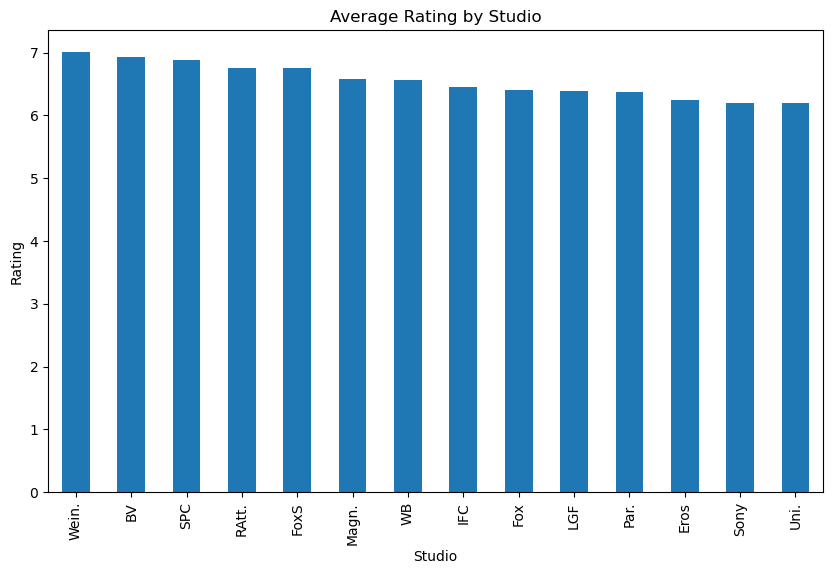

In [171]:
rating_by_studio = studio_profit.groupby('studio')['averagerating'].mean().sort_values(ascending=False)
ax = rating_by_studio.plot(kind='bar', figsize=(10,6))
ax.set_title('Average Rating by Studio')
ax.set_xlabel('Studio')
ax.set_ylabel('Rating')
plt.show()

## Evaluation
Following an evaluation of the studio's performance, it is recommended that a successful studio be consulted in order to establish a new one for Microsoft. The studio's performance was assessed based on several key metrics, including the quality of their production as evidenced by movie ratings, as well as the revenue and profits generated from their films. Implementing this approach would enable the company to produce high-quality movie content while also achieving significant revenue generation.

***


## Conclusions
Based on the analysis conducted, it is recommended that Buena Vista is the most suitable studio for Microsoft to consult. With the highest revenue and profit achieved, coupled with the second-highest average rating per movie of 6.9, Buena Vista is well positioned to provide valuable insights and expertise in producing high-quality movies that generate strong returns.

The analysis was performed on a dataset comprising 744 movies, which had been cleaned to ensure accurate results. However, it is worth noting that the use of larger datasets would have provided even more precise insights and recommendations. Additionally, exploring trending genres could be a valuable addition to the analysis, helping to identify the types of movies that would align with Microsoft's goals and objectives.

In summary, based on the findings of this analysis, it is recommended that Microsoft consult Buena Vista for their expertise and experience in producing high-quality movies that generate strong returns.
***